# NGUYỄN NHƯ QUỲNH - 11194482

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
np.random.seed(1234)

# EX2

In [2]:
dataset = pd.read_csv(r'C:\Users\Precision\Desktop\sample_project_1\data_linear.csv')
dataset

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418
5,42.0690,625.992
6,44.4828,655.248
7,46.8966,701.377
8,49.3103,748.918
9,51.7241,757.881


In [3]:
class LinearRegression:
    def train(self, X, y):
        self.X = np.c_[X, np.ones(X.shape[0])]
        inverse_mat = np.linalg.inv(np.dot(self.X.T, self.X))
        self.coef_mat = np.dot(np.dot(inverse_mat, self.X.T), y)
        
    def fit(self, X=None):
        if X is not None:
            return np.dot(np.c_[X, np.ones(X.shape[0])], self.coef_mat)
        return np.dot(self.X, self.coef_mat)
    
    def mse(self, model, y):
        return np.power(model - y, 2).sum()/y.shape[0]

In [4]:
model = LinearRegression()
model.train(dataset['Diện tích'], dataset['Giá'])
fitted_model = model.fit()

In [5]:
model.mse(fitted_model, dataset['Giá'])

246.6198784911252

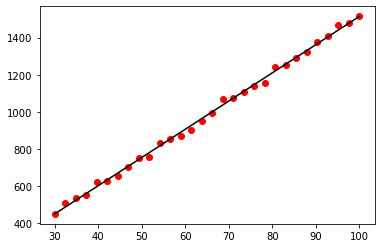

In [6]:
plt.scatter(dataset['Diện tích'], dataset['Giá'], color='red')
plt.plot(dataset['Diện tích'], fitted_model, color='black')
plt.show()

In [7]:
price = np.array([50, 100, 150])
model.fit(price)

array([ 753.49027134, 1514.04481132, 2274.59935131])

# EX3

In [8]:
header_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
              'DIS', 'RAD', 'TAX', 'PTRATION', 'B', 'LSTAT', 'PRICE']

In [9]:
housing = pd.read_csv(r'C:\Users\Precision\Desktop\sample_project_1\housing.csv', names=header_names, delim_whitespace=True)
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    float64
 10  PTRATION  506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  PRICE     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [11]:
housing.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATION    0
B           0
LSTAT       0
PRICE       0
dtype: int64

In [12]:
X = housing.drop('PRICE', axis=1)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [13]:
Y = housing['PRICE']
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [14]:
model_2 = LinearRegression()
model_2.train(X, Y)
fitted_model_2 = model_2.fit()

In [15]:
model_2.mse(fitted_model_2, Y)

21.894831181729202

END